<a href="https://colab.research.google.com/github/LLSS428/Probabilidad-y-Estadistica/blob/main/Unidad5/Practica_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Probabilidad y Estadistica**
## Unidad 5
### Practica Final
### Profesor: José Gabriel Rodriguez Rivas
### Alumno: Leonel Alberto Ontiveros Vera

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

In [12]:
# Uso de los datos dentro de los archivos
df1 = pd.read_csv("grupo1.csv")
df2 = pd.read_csv("grupo2.csv")
df3 = pd.read_csv("grupo3.csv")

In [13]:
# Función para realizar el análisis completo por grupo
def analizar_grupo(df, nombre_grupo):
    print(f"--- Análisis [{nombre_grupo}] ---")

    # Exploración inicial (Descripción estadística)
    print(df.describe())
    print("\n")

    X = df['HorasEstudio'].values.reshape(-1, 1) # Variable Independiente
    y = df['Calificacion'].values # Variable Dependiente

    # Histograma de Calificaciones
    plt.figure(figsize=(8, 4))
    sns.histplot(df['Calificacion'], kde=True)
    plt.title(f'Histograma de Calificaciones - {nombre_grupo}')
    plt.xlabel('Calificación')
    plt.ylabel('Frecuencia')
    plt.show()

    # Modelo de Regresión Lineal
    modelo = LinearRegression()
    modelo.fit(X, y)

    # Obtener pendiente e intercepto
    m = modelo.coef_[0]
    b = modelo.intercept_
    print(f"Ecuación de la regresión: Y = {m:.4f}X + {b:.4f}")

    # Cálculo de Correlación de Pearson y Valor P
    coef_corr, p_valor = pearsonr(df['HorasEstudio'], df['Calificacion'])
    r2 = modelo.score(X, y) # Coeficiente de determinación (R2) por medio de la función score

    print(f"Coeficiente de Correlación (r): {coef_corr:.4f}")
    print(f"Coeficiente de Determinación (r²): {r2:.4f}")
    print(f"Valor p: {p_valor:.4e}") # Notación científica para valores muy pequeños

    # Dispersión con Línea de Regresión
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x='HorasEstudio', y='Calificacion', data=df, color='blue', label='Datos Reales', s=100)
    y_pred = modelo.predict(X)
    plt.plot(df['HorasEstudio'], y_pred, color='red', linewidth=2, label=f'Regresión: Y={m:.2f}X+{b:.2f}')

    plt.title(f'Regresión Lineal: Horas de Estudio vs Calificación ({nombre_grupo})')
    plt.xlabel('Horas de Estudio')
    plt.ylabel('Calificación Final')
    plt.legend()
    plt.grid(True)
    plt.show()
    print("\n")

--- Análisis [Grupo 1] ---
       HorasEstudio  Calificacion
count     50.000000      50.00000
mean      14.352000      83.78820
std        4.219174       7.83389
min        3.790000      68.46000
25%       12.032500      78.03500
50%       14.600000      84.49000
75%       17.715000      88.09000
max       20.000000     100.00000




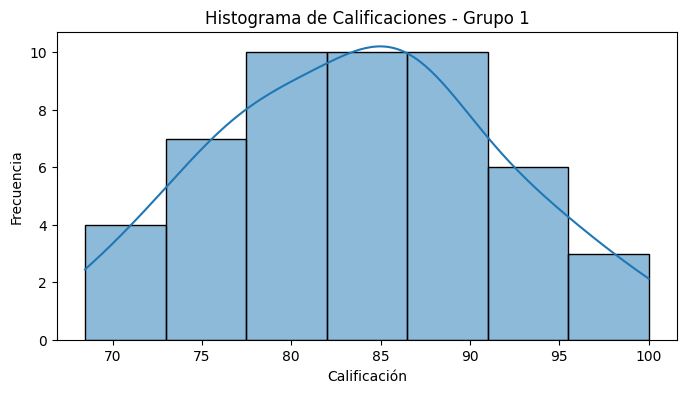

Ecuación de la regresión: Y = -0.1061X + 85.3107
Coeficiente de Correlación (r): -0.0571
Coeficiente de Determinación (r²): 0.0033
Valor p: 6.9351e-01


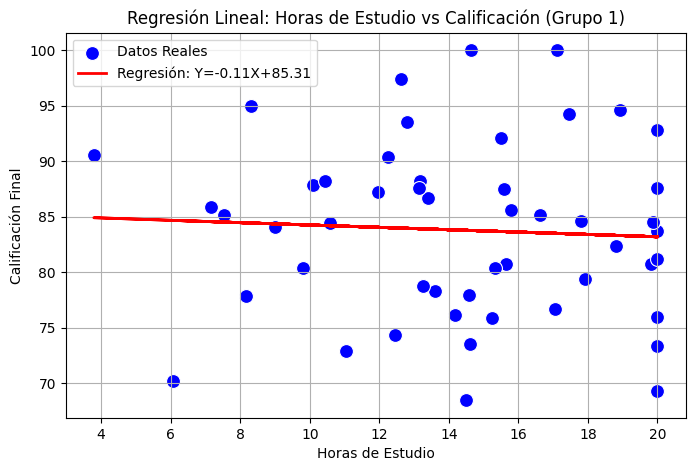



--- Análisis [Grupo 2] ---
       HorasEstudio  Calificacion
count     50.000000     50.000000
mean      14.352000     75.912000
std        4.219174     20.668922
min        3.790000     26.100000
25%       12.032500     63.500000
50%       14.600000     78.550000
75%       17.715000     93.300000
max       20.000000     99.000000




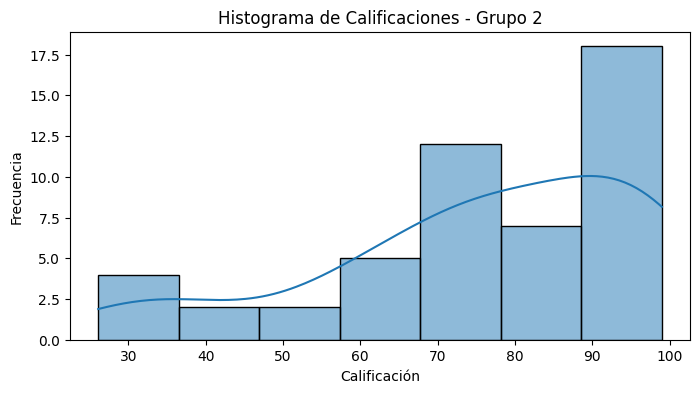

Ecuación de la regresión: Y = 4.2227X + 15.3075
Coeficiente de Correlación (r): 0.8620
Coeficiente de Determinación (r²): 0.7430
Valor p: 9.0777e-16


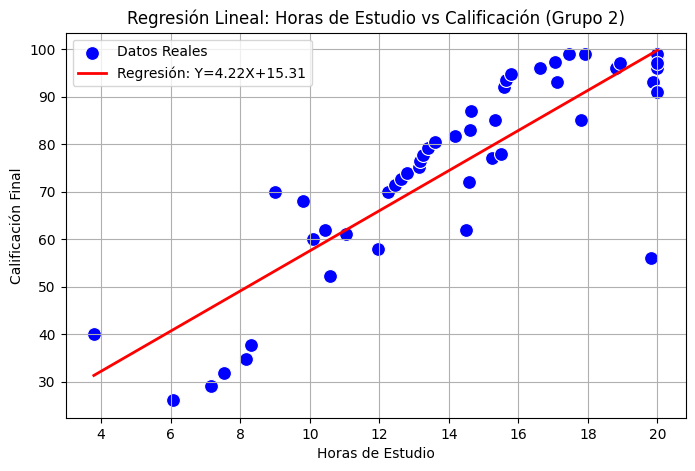



--- Análisis [Grupo 3] ---
       HorasEstudio  Calificacion
count     50.000000     50.000000
mean      14.352000     75.968000
std        4.219174     23.668867
min        3.790000     15.000000
25%       12.032500     61.000000
50%       14.600000     84.950000
75%       17.715000     94.375000
max       20.000000     99.000000




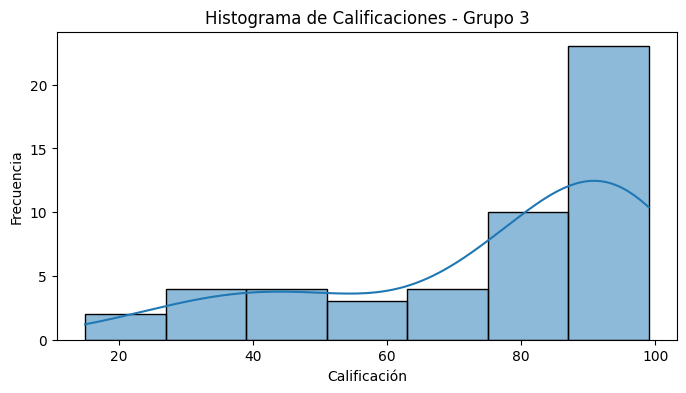

Ecuación de la regresión: Y = 5.2857X + 0.1081
Coeficiente de Correlación (r): 0.9422
Coeficiente de Determinación (r²): 0.8878
Valor p: 1.9342e-24


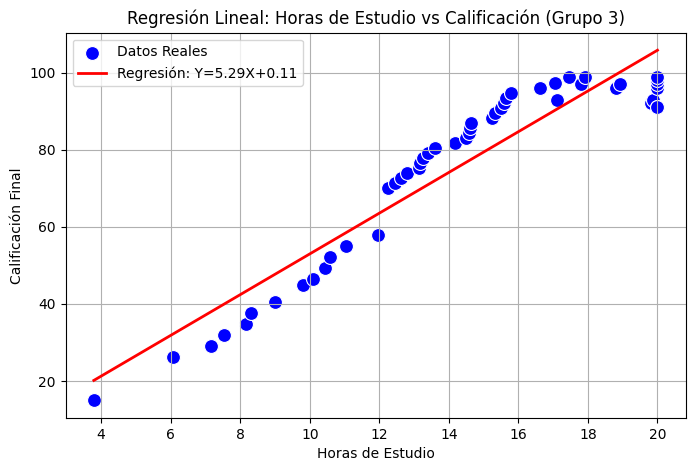

In [14]:
# Ejecución del metodo para cada grupo
analizar_grupo(df1, "Grupo 1")
analizar_grupo(df2, "Grupo 2")
analizar_grupo(df3, "Grupo 3")

1. ¿Explicar cuál es la interpretación del coeficiente de regresión en términos de la relación entre el tiempo de estudio y las calificaciones finales?

*El coeficiente de regresión indica cuánto cambia la calificación final por cada hora adicional de estudio donde, por ejemplo, en el grupo 1, este valor será cercano a 0, no importa cuánto se estudie, y en el grupo 3, este valor será alto y positivo.*

2. ¿Cómo se interpreta el coeficiente de correlación (r) en términos de la fuerza y dirección de la relación entre las variables?

*El coeficiente r mide qué tan fuerte es la relación lineal, con los datos de los grupos tenemos que:
Grupo 1: Tendrá un r cercano a 0, por lo que no hay relación lineal
Grupo 2: Tendrá un r cercano a 0.85 - 0.95, esto ndica una relación positiva fuerte.
Grupo 3: Tendrá un r muy cercano a 1.0. Indica una relación lineal positiva perfecta, donde las horas de estudio predicen exactamente la nota.*

3. ¿El modelo de regresión lineal es estadísticamente significativo?

*Tomando como base el valor p se puede decir que si el valor p es menor que 0.05, el modelo SÍ es significativo, donde en este caso entran el grupo 2 y 3, mientras que el grupo 1 probablemente NO sea significativo, indicando que el modelo no sirve para esos datos.*

4. ¿Qué tan confiable es el modelo de regresión para predecir las calificaciones finales basado en el tiempo de estudio?

*La confiabilidad se observa con el Coeficiente de Determinación, donde podemos decir que:
Grupo 1: Muy poco confiable debido a que la linea roja no pasa por los puntos.
Grupo 2: Confiable y la predicción será aproximada pero útil.
Grupo 3: Extremadamente confiable ya que puedes predecir la nota exacta sabiendo las horas.*

**Conclusiones Generales**

*La regresión lineal es útil solo cuando existe una correlación real entre variables. Por ejemplo, en el grupo 3, el tiempo es el único factor determinante, mientras que en el grupo 1, demuestra que hay "otros factores" (suerte, conocimientos previos, copia) que afectan la nota, ya que el tiempo de estudio no explica el resultado, y el análisis visual es vital antes de confiar ciegamente en los números, así es como rapidamente podemos comprobar los datos.*